<a href="https://colab.research.google.com/github/abraham220703/pSD/blob/main/_Python_009_Frequency_domain_filter_Laplacian_Filter_py_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Frequency domain filter: Laplacian filer
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open and normalized the image
f = cv2.imread('/content/grysc.jpeg',0)
f = f / 255


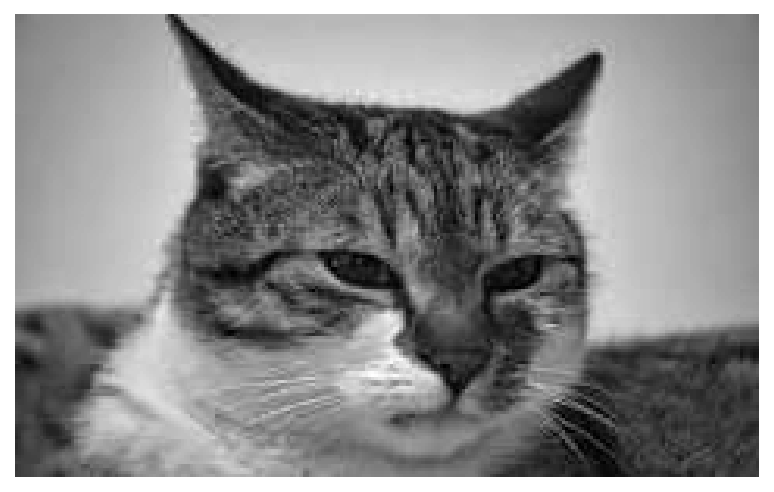

In [2]:
plt.figure(dpi=150)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

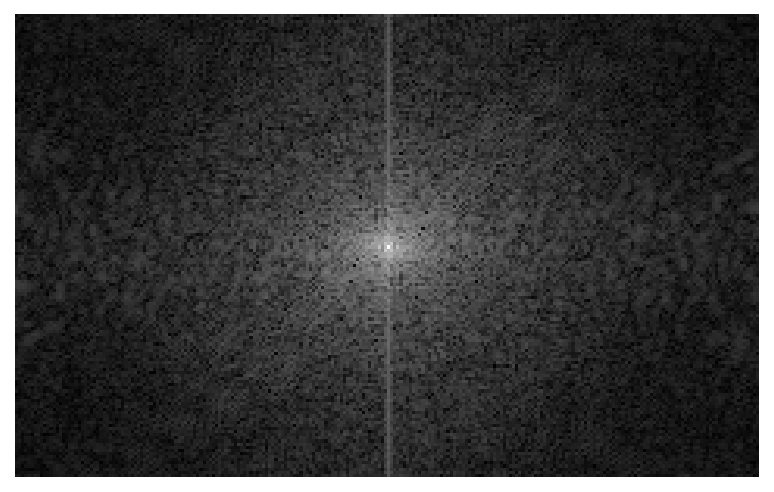

In [3]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log(np.abs(F)+1),cmap='gray')
plt.axis('off')
plt.show


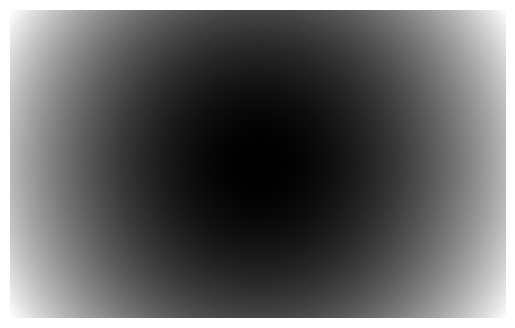

In [6]:
# laplacian filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
  for v in range(Q):
    H[u,v] = (u-P/2)**2 + (v-Q/2)**2
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# laplacian image
Lap = H * F
Lap =np.fft.ifftshift(Lap)
Lap =np.real(np.fft.ifft2(Lap))


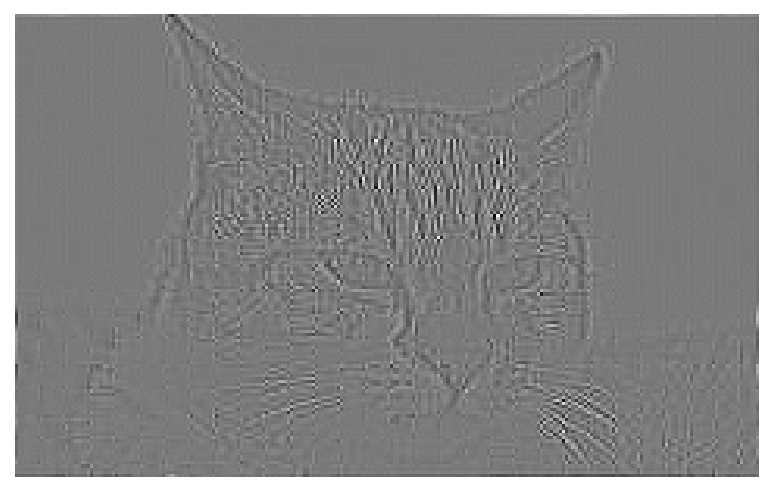

In [10]:
# convert the laplacian image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - (-1)
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + (-1)

plt.figure(dpi=150)
plt.imshow(LapScaled,cmap='gray')
plt.axis('off')
plt.show()

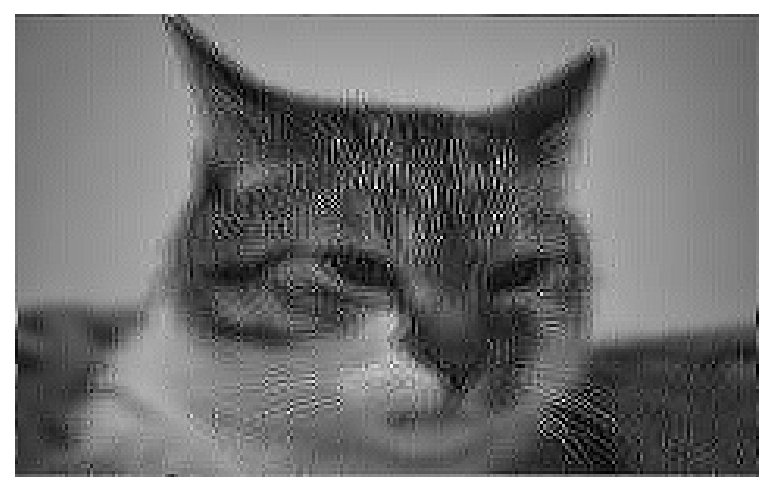

In [11]:
#image encancement
c = -1
g = f + c*LapScaled
g = np.clip(g,0,1)
plt.figure(dpi=150)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()